In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
normal = os.listdir('/content/drive/MyDrive/ECG Hack Heritage/Normal Person ECG Images (284x12=3408)')
abnormal = os.listdir('/content/drive/MyDrive/ECG Hack Heritage/ECG Images of Patient that have abnormal heartbeat (233x12=2796)')
print(len(normal))
print(len(abnormal))

284
233


In [4]:
normal_images = []
abnormal_images = []
Y = []

for f in normal:
    img = cv2.imread(os.path.join('/content/drive/MyDrive/ECG Hack Heritage/Normal Person ECG Images (284x12=3408)',f))
    img = cv2.resize(img,(200,200),interpolation=cv2.INTER_AREA)
    img = (img - img.min())/(img.max() - img.min())
    normal_images.append(img)
    Y.append(0)

for f in abnormal:
    img = cv2.imread(os.path.join('/content/drive/MyDrive/ECG Hack Heritage/ECG Images of Patient that have abnormal heartbeat (233x12=2796)',f))
    img = cv2.resize(img,(200,200),interpolation=cv2.INTER_AREA)
    img = (img - img.min())/(img.max() - img.min())
    abnormal_images.append(img)
    Y.append(1)


In [5]:
normal_images = np.array(normal_images)
abnormal_images = np.array(abnormal_images)
Y = np.array(Y)

In [6]:
normal_images.max()

1.0

In [7]:
normal_images.min()

0.0

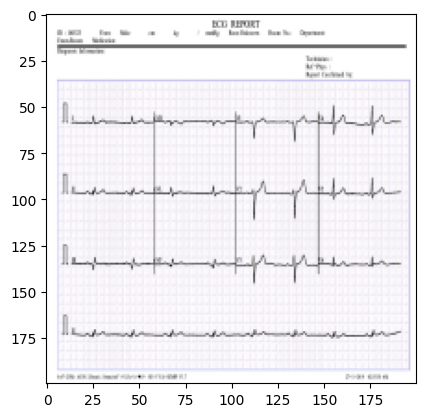

In [8]:
plt.imshow(normal_images[30])

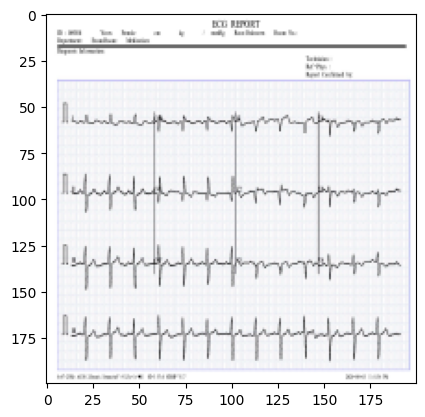

In [9]:
plt.imshow(abnormal_images[30])

In [10]:
normal_images.shape

(284, 200, 200, 3)

In [11]:
abnormal_images.shape

(233, 200, 200, 3)

In [12]:
Y.shape

(517,)

In [13]:
X = np.concatenate((normal_images,abnormal_images),axis=0)
X.shape

(517, 200, 200, 3)

In [14]:
!pip install scikit-learn

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [16]:
X_train.shape

(361, 200, 200, 3)

In [17]:
X_test.shape

(156, 200, 200, 3)

In [18]:
Y_train.shape

(361,)

In [19]:
Y_test.shape

(156,)

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPool2D,Flatten,Dense



input = Input(shape=[200,200,3])
output = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(input)
output = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(output)
output = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(output)
output = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(output)
output = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(output)
output = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(output)
output = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(output)
output = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(output)
output = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(output)
output = MaxPool2D(pool_size=(2,2))(output)
output = Flatten()(output)
output = Dense(400,activation='relu')(output)
output = Dense(380,activation='relu')(output)
output = Dense(360,activation='relu')(output)
output = Dense(340,activation='relu')(output)
output = Dense(1,activation='sigmoid')(output)

model = Model(inputs=input,outputs=output)

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [38]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 198, 198, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 196, 196, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 194, 194, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 192, 192, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 190, 190, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 188, 188, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 186, 186, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 184, 184, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 182, 182, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 91, 91, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 529984)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 400)                 │     211,994,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 380)                 │         152,380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 360)                 │         137,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 340)                 │         122,740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             341 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,703,837 (811.40 MB)

 Trainable params: 212,703,837 (811.40 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss',patience = 5)

In [39]:
model.fit(X,Y,validation_data=(X_test,Y_test),epochs=100,batch_size=20,callbacks=[earlystop])

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.5607 - loss: 1.4933 - val_accuracy: 0.5769 - val_loss: 0.6878
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 373ms/step - accuracy: 0.5550 - loss: 0.6906 - val_accuracy: 0.5769 - val_loss: 0.6859
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 375ms/step - accuracy: 0.5643 - loss: 0.6881 - val_accuracy: 0.5769 - val_loss: 0.6851
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 368ms/step - accuracy: 0.5755 - loss: 0.6868 - val_accuracy: 0.5769 - val_loss: 0.6860
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 368ms/step - accuracy: 0.5403 - loss: 0.6903 - val_accuracy: 0.5769 - val_loss: 0.6848


In [41]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Assuming X and Y are your preprocessed image data and labels
# X.shape should be (num_samples, height, width, channels)
# Y.shape should be (num_samples,)

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Load the ResNet50 model with ImageNet weights and exclude the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(X.shape[1], X.shape[2], X.shape[3]))

# Add custom layers on top of ResNet
x = Flatten()(resnet.output)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use a single output neuron with a sigmoid activation for binary classification

# Create the final model
model = Model(inputs=resnet.input, outputs=predictions)

# Freeze the layers of ResNet to only train the top layers initially
for layer in resnet.layers:
    layer.trainable = False

# Compile the model with binary cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X, Y,
                    validation_data=(X_val, Y_val),
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stopping])

# Fine-tuning (Optional)
# Unfreeze some layers of ResNet for fine-tuning
for layer in resnet.layers[-10:]:
    layer.trainable = True

# Compile again with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Continue training
history_finetune = model.fit(X, Y,
                             validation_data=(X_val, Y_val),
                             epochs=10,
                             batch_size=32,
                             callbacks=[early_stopping])

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, Y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Save the model
model.save('/content/drive/MyDrive/ECG Hack Heritage/resnet_binary_classification_model.h5')


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 910ms/step - accuracy: 0.5325 - loss: 6.8461 - val_accuracy: 0.4038 - val_loss: 0.7960
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.5301 - loss: 0.9669 - val_accuracy: 0.4038 - val_loss: 2.7412
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5461 - loss: 2.1380 - val_accuracy: 0.5962 - val_loss: 2.2227
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5198 - loss: 1.6398 - val_accuracy: 0.4038 - val_loss: 1.1367
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.5107 - loss: 0.8596 - val_accuracy: 0.8942 - val_loss: 0.5674
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.6054 - loss: 0.7462 - val_accuracy: 0.6731 - val_loss: 0.5479
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.7531 - loss: 0.5435 - val_accuracy: 0.7788 - val_loss: 0.5039
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8126 - loss: 0.5055 - val_accuracy: 0.673

Validation Loss: 1.4038790464401245, Validation Accuracy: 0.5961538553237915


In [42]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Assuming X and Y are your preprocessed image data and labels
# X.shape should be (num_samples, height, width, channels)
# Y.shape should be (num_samples,)

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Load the VGG16 model with ImageNet weights and exclude the top layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(X.shape[1], X.shape[2], X.shape[3]))

# Add custom layers on top of VGG16
x = Flatten()(vgg16.output)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use a single output neuron with a sigmoid activation for binary classification

# Create the final model
model = Model(inputs=vgg16.input, outputs=predictions)

# Freeze the layers of VGG16 to only train the top layers initially
for layer in vgg16.layers:
    layer.trainable = False

# Compile the model with binary cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X, Y,
                    validation_data=(X_val, Y_val),
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stopping])

# Fine-tuning (Optional)
# Unfreeze some layers of VGG16 for fine-tuning
for layer in vgg16.layers[-4:]:
    layer.trainable = True

# Compile again with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Continue training
history_finetune = model.fit(X, Y,
                             validation_data=(X_val, Y_val),
                             epochs=10,
                             batch_size=32,
                             callbacks=[early_stopping])

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, Y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Save the model
model.save('/content/drive/MyDrive/ECG Hack Heritage/vgg16_binary_classification_model.h5')


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 681ms/step - accuracy: 0.6137 - loss: 1.4234 - val_accuracy: 0.9712 - val_loss: 0.1487
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9596 - loss: 0.1558 - val_accuracy: 0.9615 - val_loss: 0.0904
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.9487 - loss: 0.1330 - val_accuracy: 0.9038 - val_loss: 0.2403
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9387 - loss: 0.1389 - val_accuracy: 0.9808 - val_loss: 0.0418
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9797 - loss: 0.0785 - val_accuracy: 0.9615 - val_loss: 0.0585
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.9923 - loss: 0.0356 - val_accuracy: 1.0000 - val_loss: 0.0231
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9826 - loss: 0.0605 - val_accuracy: 0.9808 - val_loss: 0.0359
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step 

Validation Loss: 0.0005894012865610421, Validation Accuracy: 1.0


In [43]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/ECG Hack Heritage/vgg16_binary_classification_model.h5')

img = cv2.imread('/content/drive/MyDrive/ECG Hack Heritage/Normal Person ECG Images (284x12=3408)/Normal(1).jpg')
img = cv2.resize(img,(200,200),interpolation=cv2.INTER_AREA)
img = (img - img.min())/(img.max() - img.min())
img = np.reshape(img,[1,200,200,3])
img.shape

(1, 200, 200, 3)

In [44]:
prediction = model.predict(img)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.00071897]], dtype=float32)

In [45]:
img = cv2.imread('/content/drive/MyDrive/ECG Hack Heritage/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(1).jpg')
img = cv2.resize(img,(200,200),interpolation=cv2.INTER_AREA)
img = (img - img.min())/(img.max() - img.min())
img = np.reshape(img,[1,200,200,3])
img.shape

(1, 200, 200, 3)

In [46]:
prediction = model.predict(img)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.9999999]], dtype=float32)